In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy import coordinates as coo, units as u

In [20]:
Nrand = 5_000_000
Nside = 20                                      # you can choose other values

In [21]:
print('The pixel number is', hp.nside2npix(Nside))
print('resolution is about', hp.nside2resol(Nside))

The pixel number is 4800
resolution is about 0.051166335397324424


In [22]:
quasar_cata = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/DR16Q_v4.fits')
quasar_cata_cut = quasar_cata[np.logical_and(quasar_cata['Z']>1, quasar_cata['Z']<3)]
c = coo.SkyCoord(ra=quasar_cata_cut['RA']*u.degree, dec=quasar_cata_cut['DEC']*u.degree)
l = c.galactic.l.to(u.rad).value
b = c.galactic.b.to(u.rad).value

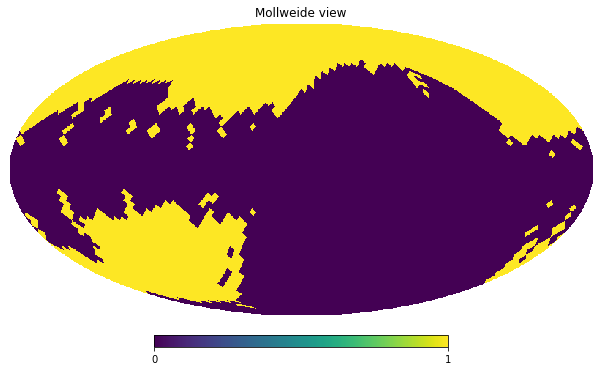

In [41]:
rand_theta = np.arccos(np.random.uniform(-1, 1, 4*Nrand))
rand_phi = np.random.uniform(0, 2*np.pi, 4*Nrand)

accept_index = np.unique(hp.ang2pix(Nside, np.pi/2-b, l))
mask = np.zeros(hp.nside2npix(Nside), bool)
mask[accept_index] = True

hp.mollview(mask)

In [42]:
rand_index = hp.ang2pix(Nside, rand_theta, rand_phi)
accept = mask[rand_index]
rand_theta = rand_theta[accept]
rand_phi = rand_phi[accept]
rand_theta = rand_theta[:Nrand]
rand_phi = rand_phi[:Nrand]

print('random sample: ', len(rand_theta))

random sample:  5000000


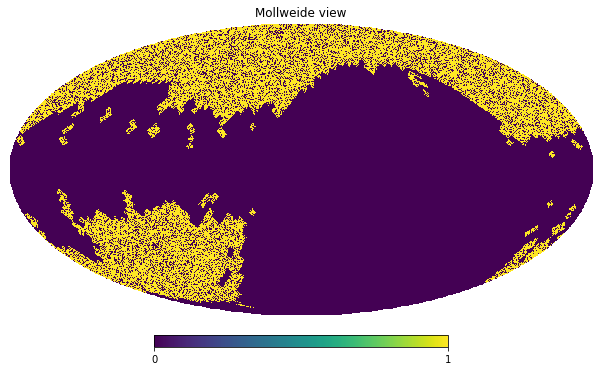

In [43]:
image = np.zeros(hp.nside2npix(1024))
image[hp.ang2pix(1024, rand_theta, rand_phi)] = 1
hp.mollview(image)

In [44]:
rand_z = np.random.choice(quasar_cata_cut['Z'], Nrand)

In [45]:
np.save('../catalogue/random_sample_quasar.npy', (rand_theta, rand_phi, rand_z))

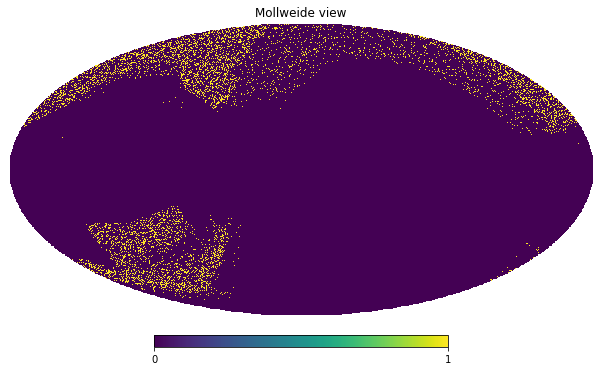

In [5]:
image = np.zeros(hp.nside2npix(1024))
image[hp.ang2pix(1024, np.pi/2-b, l)] = 1
hp.mollview(image)